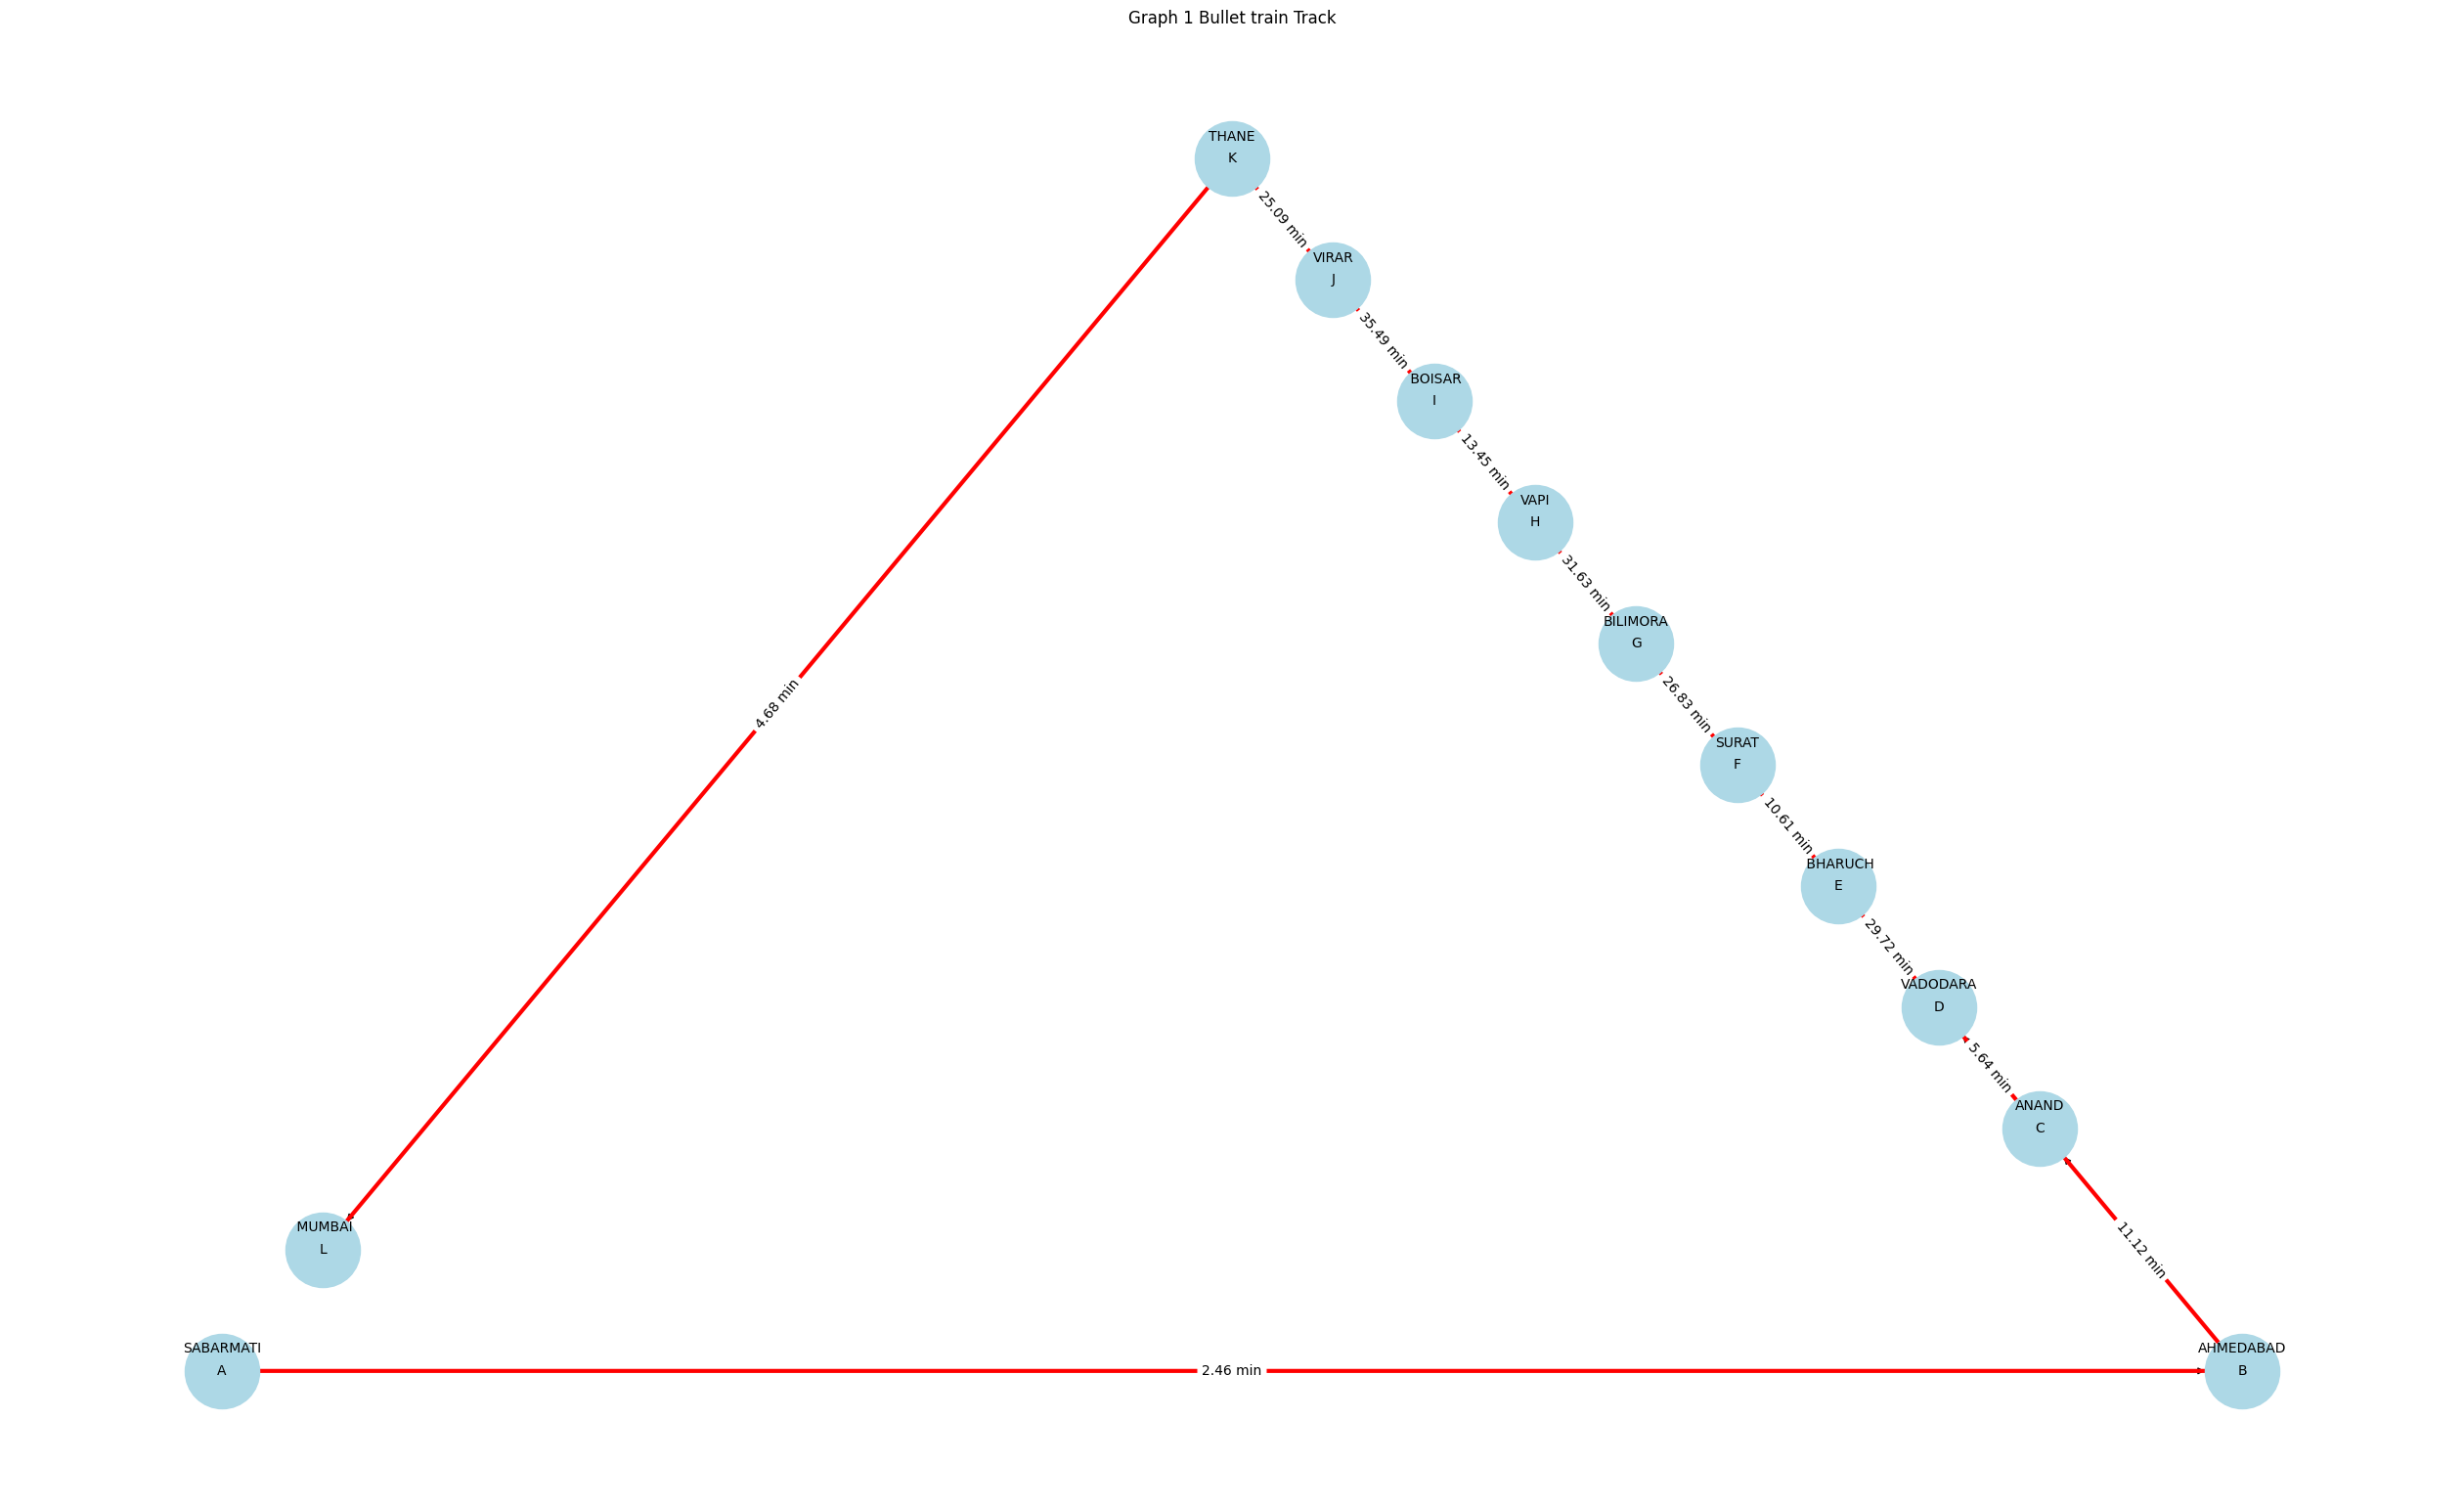


--- Task Data Tabel ---
Task ID Task Name  Expected Duration (minutes)
      A SABARMATI                     0.000000
      B AHMEDABAD                     2.455556
      C     ANAND                    11.116667
      D  VADODARA                     5.644444
      E   BHARUCH                    29.722222
      F     SURAT                    10.613889
      G  BILIMORA                    26.833333
      H      VAPI                    31.633333
      I    BOISAR                    13.450000
      J     VIRAR                    35.486111
      K     THANE                    25.094444
      L    MUMBAI                     4.680556

--- Critical Path Analysis ---
Critical Path: A -> B -> C -> D -> E -> F -> G -> H -> I -> J -> K -> L
Critical Path Length (minutes): 196.73055555555553


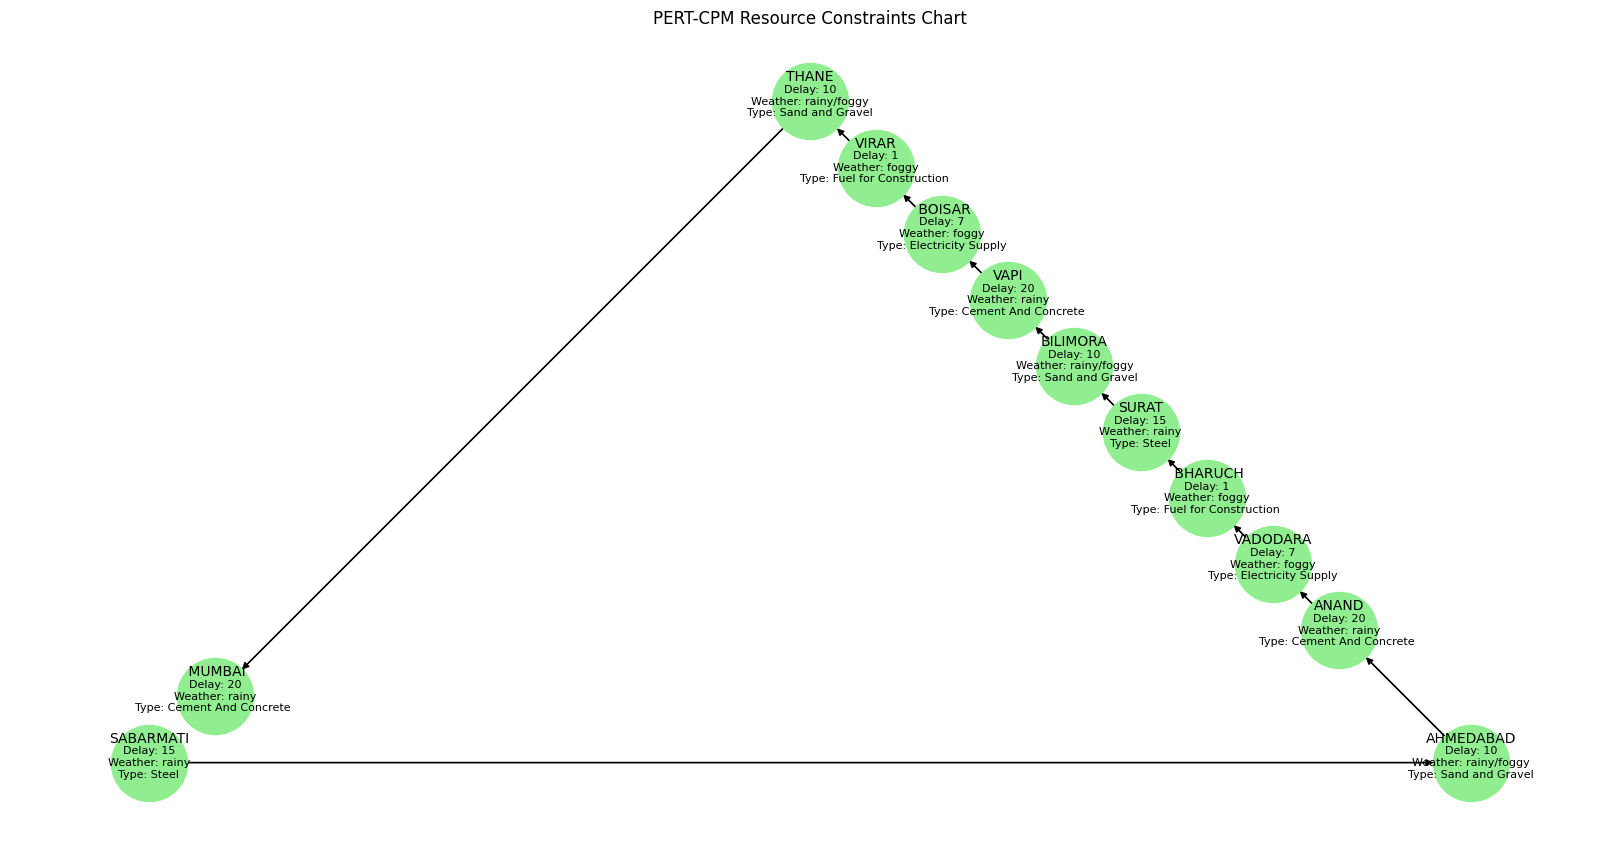


--- Resource Constraints Table ---
Task ID Seasonal Delays  Impact on Duration (days) weather        Constraint Type
      A           rainy                                 15                  Steel
      B     rainy/foggy                                 10        Sand and Gravel
      C           rainy                                 20   Cement And Concrete 
      F           foggy                                  7     Electricity Supply
      E           foggy                                  1 Fuel for Construction 
      D           rainy                                 15                  Steel
      G     rainy/foggy                                 10        Sand and Gravel
      I           rainy                                 20   Cement And Concrete 
      H           foggy                                  7     Electricity Supply
      J           foggy                                  1 Fuel for Construction 
      L     rainy/foggy                                 10    

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read csv file
task_data_path = "task_data.csv"
task_data = pd.read_csv(task_data_path)

resource_data_path = "resource_constraints.csv"
resource_data = pd.read_csv(resource_data_path)

task_data_cleaned = task_data[['Task ID','Task Name','Optimistic Duration (second)',
                               'Most Likely Duration (second)','Pessimistic Duration (second)',
                               'Predecessors']].dropna()

# Calculate expected Duration For task_data 
task_data_cleaned['Expected Duration (seconds)']=(
    task_data_cleaned['Optimistic Duration (second)'] + 
    4 * task_data_cleaned['Most Likely Duration (second)'] + 
    task_data_cleaned['Pessimistic Duration (second)'] ) / 6
task_data_cleaned['Expected Duration (minutes)'] = task_data_cleaned['Expected Duration (seconds)'] / 60

# Graph 1 For task_data.csv PERT-CPM
G1 = nx.DiGraph()

for _, row in task_data_cleaned.iterrows():
    task_id = row['Task ID']
    duration = row['Expected Duration (minutes)']
    predecessors = str(row['Predecessors']).split(',')

    G1.add_node(task_id,name=row['Task Name'],duration=duration)

    for pred in predecessors:
        pre = pred.strip()
        if pred and pred != "0":
            G1.add_edge(pred,task_id,weight=duration)

# Critical Path For Graph 1
critical_path_1 = nx.dag_longest_path(G1,weight='weight')
critical_path_length_1 = nx.dag_longest_path_length(G1, weight='weight')

# Displaying the graph 1
plt.figure(figsize=(25,15))
pos1 = nx.planar_layout(G1)

# create a node
nx.draw(G1,pos1,with_labels=True, node_size=3000,node_color="lightblue", font_size=10)
nx.draw_networkx_edges(G1,pos1,edge_color="black",width=1)

# highlighte the critical path
critical_edges_1 = [(critical_path_1[i],critical_path_1[i+1]) for i in range(len(critical_path_1)-1)]
nx.draw_networkx_edges(G1,pos1, edgelist=critical_edges_1, edge_color="red",width=3)

# add name
label_pos1 = {node: (x,y + 0.0150) for node, (x,y) in pos1.items()}
node_labels_1 = {node: f"{G1.nodes[node]['name']}" for node in G1.nodes}
nx.draw_networkx_labels(G1, label_pos1,labels=node_labels_1 ,font_size=10,font_color="black")

# add duration time
edge_labels_1 ={(u,v):
                f"{d['weight']:.2f} min" for u,v,d in G1.edges(data=True)}
nx.draw_networkx_edge_labels(G1, pos1, edge_labels = edge_labels_1) 

plt.title("Graph 1 Bullet train Track")
plt.show()

# Display Task_Data tabel
print("\n--- Task Data Tabel ---")
print(task_data_cleaned[['Task ID', 'Task Name', 'Expected Duration (minutes)']].to_string(index=False))
print("\n--- Critical Path Analysis ---")
print("Critical Path:"," -> ".join(critical_path_1))
print("Critical Path Length (minutes):", critical_path_length_1)

# Graph 2 for Resource Constraints 
G2 = nx.DiGraph()

for _, row in resource_data.iterrows():
    task_id = row['Task ID']
    delay = row['Impact on Duration (days) weather']
    seasonal_delay = row['Seasonal Delays']
    constraint_type = row['Constraint Type']

    G2.add_node(task_id, delay=delay, seasonal_delay=seasonal_delay,constraint_type=constraint_type)

# Displaying the graph 2
plt.figure(figsize=(16,8))
pos2 = nx.planar_layout(G2)

# create a node
nx.draw (G1, pos1,node_size=3000, node_color="lightgreen", font_size=10)
nx.draw_networkx_edges(G1, pos1, edge_color="black", width=1)

# add name
label_pos1 = {node: (x,y + 0.03) for node, (x,y) in pos1.items()}
node_labels_1 = {node: f"{G1.nodes[node]['name']}" for node in G1.nodes}
nx.draw_networkx_labels(G1, label_pos1, labels=node_labels_1, font_size=10, font_color="black")

# add details
label_pos2 = {node: (x,y + 0.0) for node, (x,y)in pos2.items()}
node_labels_2 = {node: f"Delay: {G2.nodes[node]['delay']}\n"
                       f"Weather: {G2.nodes[node]['seasonal_delay']}\n"
                       f"Type: {G2.nodes[node]['constraint_type']}"
                 for node in G2.nodes}
nx.draw_networkx_labels(G2, label_pos2, labels=node_labels_2, font_size=8, font_color="black")

plt.title("PERT-CPM Resource Constraints Chart")
plt.show()

# Display Resource Constraints Table
print("\n--- Resource Constraints Table ---")
print(resource_data[['Task ID','Seasonal Delays','Impact on Duration (days) weather','Constraint Type']].to_string(index=False))